In [156]:
import multiprocessing
import os
from re import A
from typing import ItemsView

from py import log
os.environ['PYTHONDONTWRITEBYTECODE'] = '1'
from xtquant import xttrader
from xtquant import xtdata
from xtquant.xttrader import XtQuantTrader, XtQuantTraderCallback
from xtquant.xttype import StockAccount
from xtquant import xtconstant
import pandas_market_calendars as mcal
import pandas as pd
import akshare as ak

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
def plot(df, column):
    
    # 设置中文字体
    mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定中文字体为 SimHei
    mpl.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

    # 假设这是你的DataFrame，其中包含收益

    # 绘制收益曲线
    # 将日期列转换为日期类型
    # df['date'] = pd.to_datetime(df['date'])

    # # 设置日期列为索引
    # df.set_index('date', inplace=True)
    df.index = pd.to_datetime(df.index)
    # 绘制收益曲线
    plt.figure(figsize=(10, 6))  # 设置图表大小
    plt.plot(df.index, df[column], label='Return')
    plt.title('收益曲线')
    plt.xlabel('日期')
    plt.ylabel('收益率')
    plt.legend()  # 显示图例
    plt.grid(True)  # 显示网格线

    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    # plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

    plt.show()

In [157]:
import sqlite3
# months = ['202409', '202410', '202411', '202412']
months = ['202501', '202502' ]
# months = ['202409', '202410']
combined_df = pd.DataFrame()
for month in months:
    conn = sqlite3.connect('D:\workspace\TradeX\ezMoney\sqlite_db\strategy_data.db')
    db_name = 'strategy_data_aftermarket_%s' % month
    query = "select * from %s where (sub_strategy_name = '低位孕线低吸' or strategy_name = 'xiao_cao_dwyxdx') and stock_rank = 1 " % db_name
    df = pd.read_sql_query(query, conn)
    combined_df = pd.concat([combined_df, df], axis=0)
combined_df = combined_df.reset_index(drop=True)
combined_df

,id,date_key,strategy_name,sub_strategy_name,stock_code,stock_name,stock_rank,block_category,block_codes,industry_code,...,mod_name,mod_short_line_score,mod_short_line_score_change,mod_short_line_rank,mod_trend_score,mod_trend_score_change,mod_trend_rank,env_json_info,block_category_info,created_at
0,217,2025-01-02,低吸,低位孕线低吸,002345.XSHE,潮宏基,1,"000012.BKDL,000003.BKDL,000038.BKDL,000023.BKD...","885869.DDBK,885933.DDBK,885420.DDBK,885694.DDB...",980373.ZHBK,...,低位孕线低吸,116.01,111.57,1,131.36,12.36,1,"{""9A0001"": {""realShortLineScore"": -43.86, ""rea...","{""000033.BKDL"": {""categoryCode"": ""000033.BKDL""...",2025-02-15 19:21:18
1,272,2025-01-03,低吸,低位孕线低吸,603390.XSHG,通达电气,1,"000003.BKDL,000006.BKDL,000027.BKDL,000004.BKDL","885757.DDBK,885806.DDBK,885766.DDBK,885521.DDB...",980372.ZHBK,...,低位孕线低吸,119.66,3.65,1,139.08,-2.83,1,"{""9A0001"": {""realShortLineScore"": -72.54, ""rea...","{""000026.BKDL"": {""categoryCode"": ""000026.BKDL""...",2025-02-15 19:22:25
2,335,2025-01-06,低吸,低位孕线低吸,002119.XSHE,康强电子,1,"000003.BKDL,000035.BKDL,000031.BKDL,000033.BKD...","885571.DDBK,886042.DDBK,885333.DDBK,886009.DDB...",980357.ZHBK,...,低位孕线低吸,107.47,-12.19,2,127.89,0.97,1,"{""9A0001"": {""realShortLineScore"": -74.29, ""rea...","{""000033.BKDL"": {""categoryCode"": ""000033.BKDL""...",2025-02-15 19:23:37
3,387,2025-01-07,低吸,低位孕线低吸,002112.XSHE,三变科技,1,"000023.BKDL,000035.BKDL,000004.BKDL,000017.BKD...","885869.DDBK,885924.DDBK,885641.DDBK,886021.DDB...",980474.ZHBK,...,低位孕线低吸,114.12,6.65,1,134.11,-3.86,1,"{""9A0001"": {""realShortLineScore"": -64.08, ""rea...","{""000033.BKDL"": {""categoryCode"": ""000033.BKDL""...",2025-02-15 19:24:43
4,416,2025-01-08,低吸,低位孕线低吸,603118.XSHG,共进股份,1,"000012.BKDL,000003.BKDL,000026.BKDL,000006.BKD...","885840.DDBK,885459.DDBK,885843.DDBK,886009.DDB...",980376.ZHBK,...,低位孕线低吸,80.31,-33.81,1,127.45,-14.25,1,"{""9A0001"": {""realShortLineScore"": -53.33, ""rea...","{""000035.BKDL"": {""categoryCode"": ""000035.BKDL""...",2025-02-15 19:25:48
5,478,2025-01-09,低吸,低位孕线低吸,000905.XSHE,厦门港务,1,"000038.BKDL,000026.BKDL,000018.BKDL,000010.BKD...","885694.DDBK,886021.DDBK,885617.DDBK,885642.DDB...",980339.ZHBK,...,低位孕线低吸,99.63,19.32,1,138.86,-3.26,1,"{""9A0001"": {""realShortLineScore"": -41.26, ""rea...","{""000035.BKDL"": {""categoryCode"": ""000035.BKDL""...",2025-02-15 19:26:56
6,615,2025-01-13,低吸,低位孕线低吸,002523.XSHE,天桥起重,1,"000012.BKDL,000035.BKDL,000018.BKDL,000006.BKD...","885571.DDBK,885641.DDBK,886021.DDBK,885806.DDB...",980365.ZHBK,...,低位孕线低吸,104.07,-13.63,1,136.00,-7.51,1,"{""9A0001"": {""realShortLineScore"": -29.91, ""rea...","{""000035.BKDL"": {""categoryCode"": ""000035.BKDL""...",2025-02-15 19:29:23
7,655,2025-01-14,低吸,低位孕线低吸,001368.XSHE,通达创智,1,"000021.BKDL,000012.BKDL,000026.BKDL,000018.BKD...","885899.DDBK,885840.DDBK,885598.DDBK,885617.DDB...",980373.ZHBK,...,低位孕线低吸,101.62,-2.45,2,135.48,0.69,1,"{""9A0001"": {""realShortLineScore"": -21.14, ""rea...","{""000012.BKDL"": {""categoryCode"": ""000012.BKDL""...",2025-02-15 19:30:37
8,713,2025-01-15,低吸,低位孕线低吸,001282.XSHE,三联锻造,1,"000014.BKDL,000027.BKDL,000032.BKDL,000033.BKDL","885785.DDBK,885598.DDBK,885467.DDBK,885834.DDB...",980372.ZHBK,...,低位孕线低吸,71.21,-30.41,4,128.11,-10.97,1,"{""9A0001"": {""realShortLineScore"": 1.14, ""realT...","{""000012.BKDL"": {""categoryCode"": ""000012.BKDL""...",2025-02-15 19:31:45
9,811,2025-01-16,低吸,低位孕线低吸,002757.XSHE,南兴股份,1,"000003.BKDL,000026.BKDL,000023.BKDL,000006.BKD...","885459.DDBK,885930.DDBK,885957.DDBK,885517.DDB...",980365.ZHBK,...,低位孕线低吸,49.11,-22.10,7,119.41,-6.45,1,"{""9A0001"": {""realShortLineScore"": 5.74, ""realT...","{""000012.BKDL"": {""categoryCode"": ""000012.BKDL""...",2025-02-15 19:33:10


In [158]:
combined_df = combined_df.drop(['env_json_info', 'block_category_info'], axis=1)

# 将索引设置为 date_key 列
combined_df = combined_df.set_index('date_key')

# 对索引进行排序
combined_df = combined_df.sort_index()

combined_df.columns

Index(['id', 'strategy_name', 'sub_strategy_name', 'stock_code', 'stock_name',
       'stock_rank', 'block_category', 'block_codes', 'industry_code',
       'max_block_category_rank', 'max_block_code_rank',
       'max_industry_code_rank', 'is_bottom', 'is_broken_plate',
       'is_down_broken', 'is_fall', 'is_first_down_broken',
       'is_first_up_broken', 'is_gestation_line', 'is_half', 'is_high',
       'is_highest', 'is_long_shadow', 'is_low', 'is_medium', 'is_meso',
       'is_plummet', 'is_pre_st', 'is_small_high_open', 'is_up_broken',
       'is_weak', 'first_limit_up_days', 'jsjl', 'cjs', 'xcjw', 'jssb',
       'open_pct_rate', 'open_price', 'close_price', 'pre_close_price',
       'next_day_open_price', 'next_day_close_price',
       'next_day_high_price_open_10mins', 'next_day_low_price_open_10mins',
       'next_day_high_price', 'next_day_low_price', 'in_premarket',
       'in_premarket_match', 'mod_code', 'mod_name', 'mod_short_line_score',
       'mod_short_line_score_cha

In [159]:
dwndx = combined_df[combined_df['strategy_name'] == 'xiao_cao_dwyxdx']
dwndx['return'] = dwndx['next_day_open_price']/dwndx['open_price'] - 1
dwndx['real_return'] =  dwndx['return'] - 0.003
dwndx['cumulative_returns'] = (1 + dwndx['return']).cumprod()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_33420\2401145929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dwndx['return'] = dwndx['next_day_open_price']/dwndx['open_price'] - 1
C:\Users\Administrator\AppData\Local\Temp\ipykernel_33420\2401145929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dwndx['real_return'] =  dwndx['return'] - 0.003
C:\Users\Administrator\AppData\Local\Temp\ipykernel_33420\2401145929.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [160]:
def caculate_returns(returns_df, row, _print = False):
    r = {}
    cumulative_returns = (1 + returns_df[row]).cumprod()

    # 计算最大回撤
    cumulative_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - cumulative_max) / cumulative_max
    max_drawdown = drawdown.min()

    # 计算夏普比率
    risk_free_rate = 0.0  # 假设无风险利率为0
    sharpe_ratio = (returns_df[row].mean() - risk_free_rate) / returns_df[row].std()

    # 计算总收益率
    total_return = cumulative_returns.iloc[-1] - 1

    # 计算波动率
    volatility = returns_df[row].std()

    # 计算总盈亏
    total_profit_loss = cumulative_returns.iloc[-1] - cumulative_returns.iloc[0]

    # 计算成功次数、胜率、平均盈利、平均亏损、最大盈利、最大亏损以及盈亏比
    profitable_trades = returns_df[row][returns_df[row] > 0].count()
    losing_trades = returns_df[row][returns_df[row] < 0].count()
    win_rate = profitable_trades / (profitable_trades + losing_trades) if (profitable_trades + losing_trades) > 0 else 0
    average_profit = returns_df[row][returns_df[row] > 0].mean() if profitable_trades > 0 else 0
    average_loss = returns_df[row][returns_df[row] < 0].mean() if losing_trades > 0 else 0
    max_profit = returns_df[row].max()
    max_loss = returns_df[row].min()
    total_trades = profitable_trades + losing_trades
    total_times = returns_df[row].count()
    trade_pct = total_times / total_trades
    profit_loss_ratio = average_profit / abs(average_loss) if average_loss != 0 else 0
    kelly_fraction = win_rate - ((1 - win_rate) / profit_loss_ratio) if profit_loss_ratio != 0 else 0
    return_per_day = total_return / total_times
    year_return = return_per_day * 365

    r['最大回撤'] =  max_drawdown
    r['夏普比率'] =  sharpe_ratio
    r['总收益率'] =  total_return
    r['波动率'] = volatility
    r['年化收益率'] = year_return
    r['总盈亏'] = total_profit_loss
    r['成功次数'] = profitable_trades
    r['失败次数'] = losing_trades
    r['总天数'] = total_times
    r['总交易次数'] = total_trades
    r['交易频率'] = trade_pct
    r['胜率'] = win_rate
    r['平均盈利'] = average_profit
    r['平均亏损'] = average_loss
    r['最大盈利'] = max_profit
    r['最大亏损'] = max_loss
    r['盈亏比'] = profit_loss_ratio
    r['凯利公式最佳仓位'] = kelly_fraction
    if _print:
        print(f"最大回撤: {max_drawdown:.2%}")
        print(f"夏普比率: {sharpe_ratio:.2f}")
        print(f"总收益率: {total_return:.2%}")
        print(f"年化收益率: {year_return:.2%}")
        print(f"波动率: {volatility:.2%}")
        print(f"总盈亏: {total_profit_loss:.2%}")
        print(f"成功次数: {profitable_trades}")
        print(f"失败次数: {losing_trades}")
        print(f"总天数: {total_times}")
        print(f"总交易次数: {total_trades}")
        print(f"交易频率: {trade_pct:.2%}")
        print(f"胜率: {win_rate:.2%}")
        print(f"平均盈利: {average_profit:.2%}")
        print(f"平均亏损: {average_loss:.2%}")
        print(f"最大盈利: {max_profit:.2%}")
        print(f"最大亏损: {max_loss:.2%}")
        print(f"盈亏比: {profit_loss_ratio:.2f}")
        print(f"凯利公式最佳仓位: {kelly_fraction:.2%}")

    return r

In [161]:
print("return:")
caculate_returns(dwndx, 'real_return', _print=True)
print('-----------------------------------------------------')

return:
最大回撤: -3.94%
夏普比率: 0.50
总收益率: 66.94%
年化收益率: 1017.99%
波动率: 4.50%
总盈亏: 63.03%
成功次数: 17
失败次数: 7
总天数: 24
总交易次数: 24
交易频率: 100.00%
胜率: 70.83%
平均盈利: 3.81%
平均亏损: -1.54%
最大盈利: 16.35%
最大亏损: -3.10%
盈亏比: 2.47
凯利公式最佳仓位: 59.04%
-----------------------------------------------------


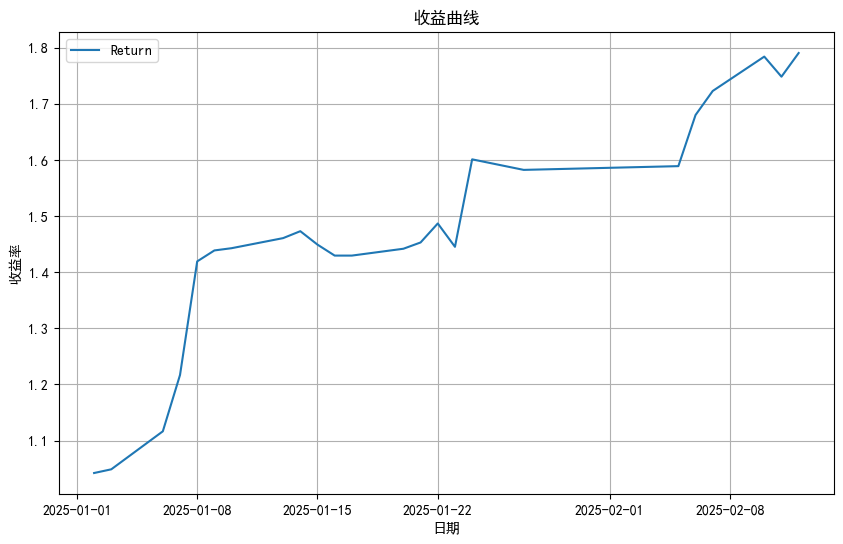

In [162]:
plot(dwndx, 'cumulative_returns')

In [163]:
dwndx1 = dwndx[['stock_code', 'stock_name', 'open_price', 'max_block_category_rank','max_block_code_rank','max_industry_code_rank','close_price', 'next_day_open_price', 'next_day_close_price', 'real_return', 'mod_short_line_rank', 'mod_name','mod_short_line_rank', 'mod_trend_rank', 'return',
       'real_return', 'cumulative_returns']]

In [164]:
dwndx1

,stock_code,stock_name,open_price,max_block_category_rank,max_block_code_rank,max_industry_code_rank,close_price,next_day_open_price,next_day_close_price,real_return,mod_short_line_rank,mod_name,mod_short_line_rank,mod_trend_rank,return,real_return,cumulative_returns
date_key,,,,,,,,,,,,,,,,,
2025-01-02,002345.XSHE,潮宏基,5.71,3,2,45,6.13,5.95,5.62,0.039032,-1,,-1,-1,0.042032,0.039032,1.042032
2025-01-03,603390.XSHG,通达电气,11.03,6,5,34,10.96,11.10,9.86,0.003346,-1,,-1,-1,0.006346,0.003346,1.048645
2025-01-06,002119.XSHE,康强电子,15.16,1,6,31,16.09,16.14,17.70,0.061644,-1,,-1,-1,0.064644,0.061644,1.116433
2025-01-07,002112.XSHE,三变科技,12.11,1,1,12,13.76,13.20,13.41,0.087008,-1,,-1,-1,0.090008,0.087008,1.216921
2025-01-08,603118.XSHG,共进股份,9.25,2,1,40,10.57,10.79,11.63,0.163486,-1,,-1,-1,0.166486,0.163486,1.419522
2025-01-09,000905.XSHE,厦门港务,7.27,7,5,100,7.56,7.37,7.02,0.010755,-1,,-1,-1,0.013755,0.010755,1.439048
2025-01-10,000795.XSHE,英洛华,10.80,-1,-1,-1,11.19,10.83,11.26,-0.000222,-1,,-1,-1,0.002778,-0.000222,1.443045
2025-01-13,002523.XSHE,天桥起重,3.21,1,6,12,3.19,3.25,3.40,0.009461,-1,,-1,-1,0.012461,0.009461,1.461027
2025-01-14,001368.XSHE,通达创智,20.10,1,2,27,20.34,20.27,20.04,0.005458,-1,,-1,-1,0.008458,0.005458,1.473384


In [114]:
plot(df, 'p_cumulative_returns')

KeyError: 'p_cumulative_returns'

<Figure size 1000x600 with 0 Axes>

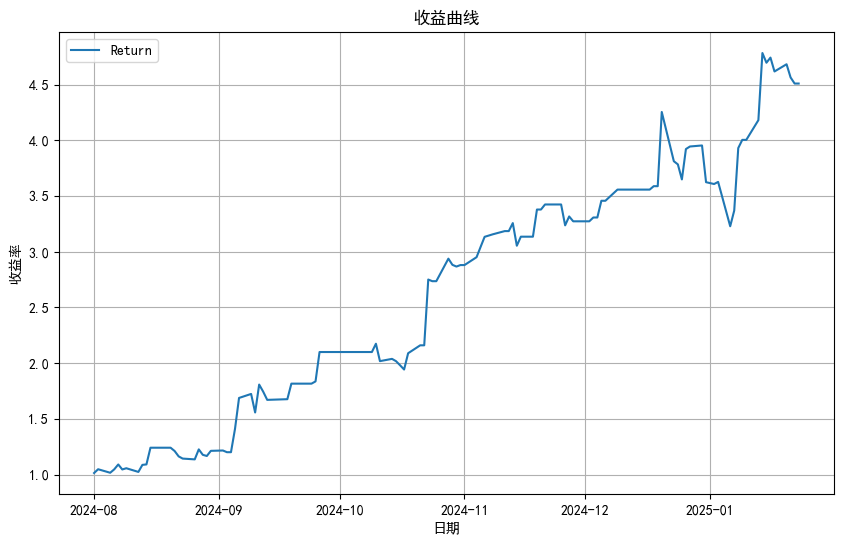

In [166]:
plot(df, 'first_cumulative_returns')

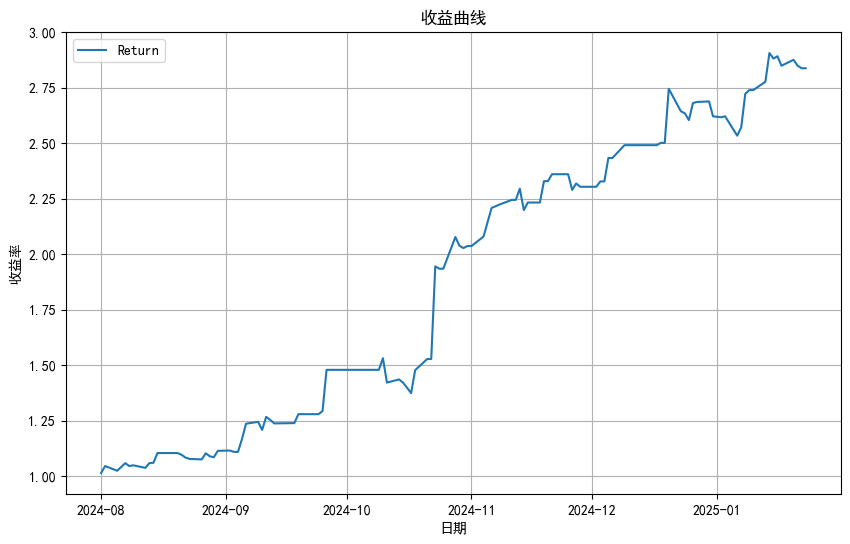

In [167]:
plot(df, 'p_first_cumulative_returns')

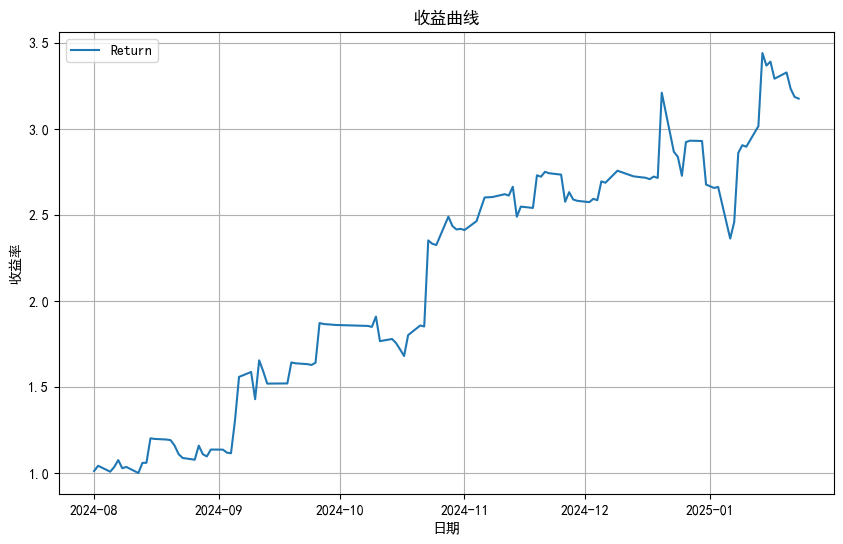

In [168]:
plot(df, 'hd_cumulative_returns')

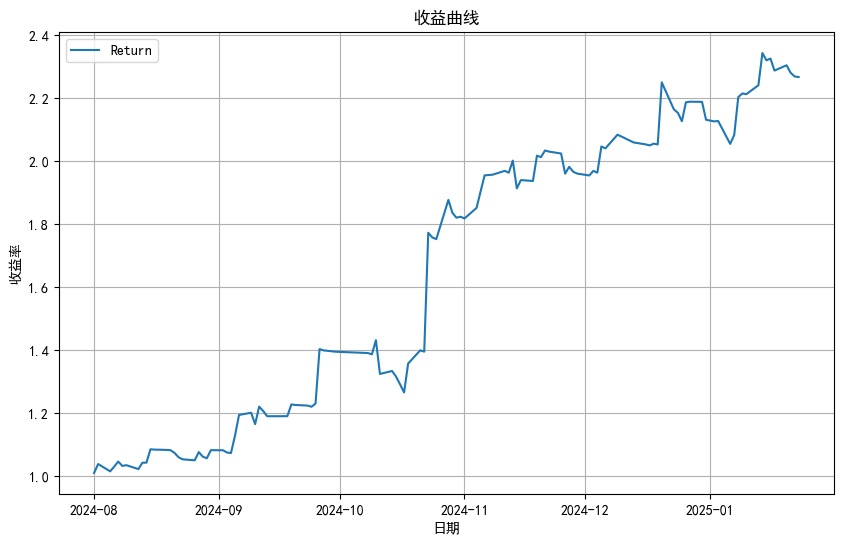

In [169]:
plot(df, 'hd_p_cumulative_returns')

In [170]:
len(df_g_zero)

87

In [171]:
len(df)

118

In [172]:
len(df)/len(df_g_zero)

1.3563218390804597

In [116]:
df_after_date = df.loc[df.index >= '2025-01-01']
df_after_date['cumulative_returns'] = (1 + df_after_date['return']).cumprod()
df_after_date['p_return'] = df_after_date['return'] * df_after_date['position']
df_after_date['p_cumulative_returns'] = (1 + df_after_date['p_return']).cumprod()
df_after_date['first_cumulative_returns'] = (1 + df_after_date['first_return']).cumprod()
df_after_date['p_first_return'] = df_after_date['first_return'] * df_after_date['position']
df_after_date['p_first_cumulative_returns'] = (1 + df_after_date['p_first_return']).cumprod()
df_after_date_g_zero = df_after_date[df_after_date['codes_num'] > 0]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4620\1530999281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_date['cumulative_returns'] = (1 + df_after_date['return']).cumprod()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4620\1530999281.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_date['p_return'] = df_after_date['return'] * df_after_date['position']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4620\1530999281.py:4: SettingWithCopyWarning: 
A value is tryi

In [56]:
print("return:")
caculate_returns(df_after_date_g_zero, 'return', True)
print('-------------------------------------------------------------------')

return:
最大回撤: -10.98%
夏普比率: 0.26
总收益率: 24.44%
年化收益率: 637.23%
波动率: 6.93%
总盈亏: 24.89%
成功次数: 8
失败次数: 6
总天数: 14
总交易次数: 14
交易频率: 100.00%
胜率: 57.14%
平均盈利: 5.58%
平均亏损: -3.27%
最大盈利: 16.65%
最大亏损: -10.98%
盈亏比: 1.71
凯利公式最佳仓位: 32.04%
-------------------------------------------------------------------


In [57]:
print("p return:")
caculate_returns(df_after_date_g_zero, 'p_return', True)
print("---------------------------------------------------------------------")


p return:
最大回撤: -3.33%
夏普比率: 0.25
总收益率: 8.27%
年化收益率: 215.70%
波动率: 2.35%
总盈亏: 8.42%
成功次数: 8
失败次数: 6
总天数: 14
总交易次数: 14
交易频率: 100.00%
胜率: 57.14%
平均盈利: 1.93%
平均亏损: -1.19%
最大盈利: 5.87%
最大亏损: -3.33%
盈亏比: 1.62
凯利公式最佳仓位: 30.77%
---------------------------------------------------------------------


In [58]:
print("first return:")
caculate_returns(df_after_date_g_zero, 'first_return', True)
print("----------------------------------------------------------------------")


first return:
最大回撤: -10.98%
夏普比率: 0.26
总收益率: 24.44%
年化收益率: 637.23%
波动率: 6.93%
总盈亏: 24.89%
成功次数: 8
失败次数: 6
总天数: 14
总交易次数: 14
交易频率: 100.00%
胜率: 57.14%
平均盈利: 5.58%
平均亏损: -3.27%
最大盈利: 16.65%
最大亏损: -10.98%
盈亏比: 1.71
凯利公式最佳仓位: 32.04%
----------------------------------------------------------------------


In [59]:
print("p first_return:")
caculate_returns(df_after_date_g_zero, 'p_first_return', True)
print("-----------------------------------------------------------------------")

p first_return:
最大回撤: -3.33%
夏普比率: 0.25
总收益率: 8.27%
年化收益率: 215.70%
波动率: 2.35%
总盈亏: 8.42%
成功次数: 8
失败次数: 6
总天数: 14
总交易次数: 14
交易频率: 100.00%
胜率: 57.14%
平均盈利: 1.93%
平均亏损: -1.19%
最大盈利: 5.87%
最大亏损: -3.33%
盈亏比: 1.62
凯利公式最佳仓位: 30.77%
-----------------------------------------------------------------------


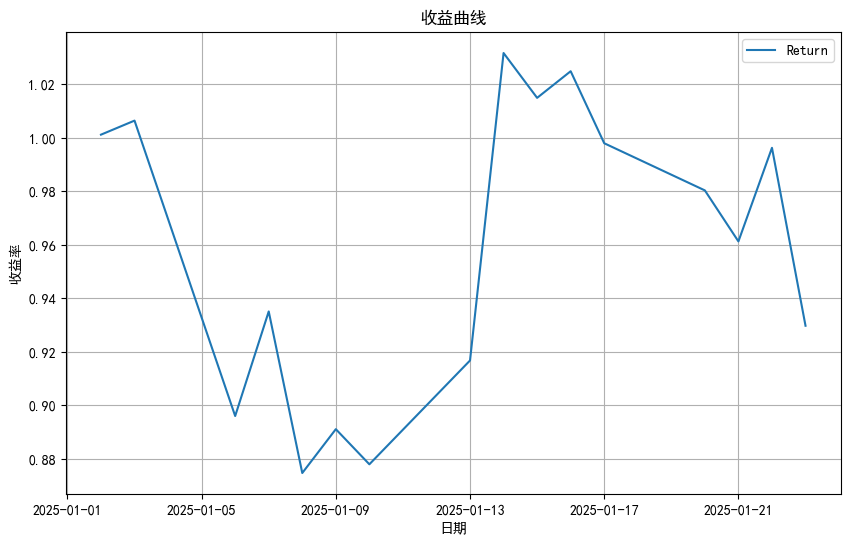

In [23]:
plot(df_after_date, 'cumulative_returns')

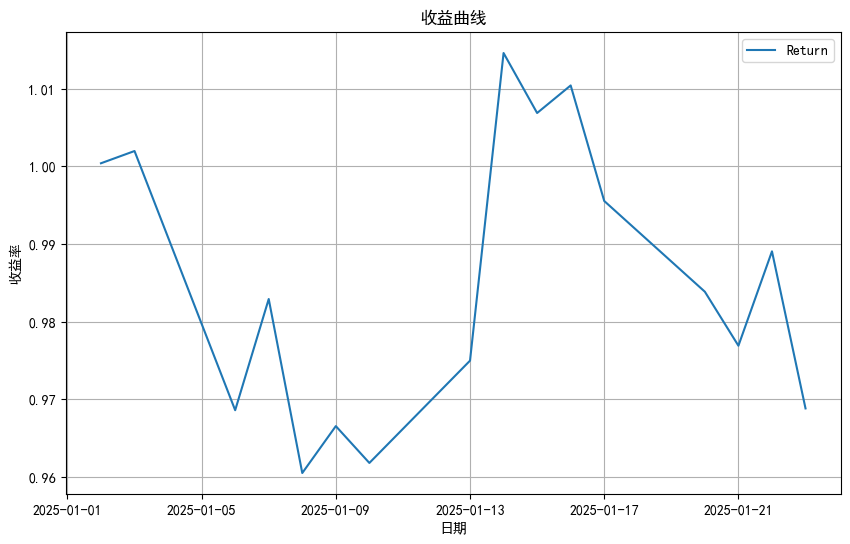

In [24]:
plot(df_after_date, 'p_cumulative_returns')

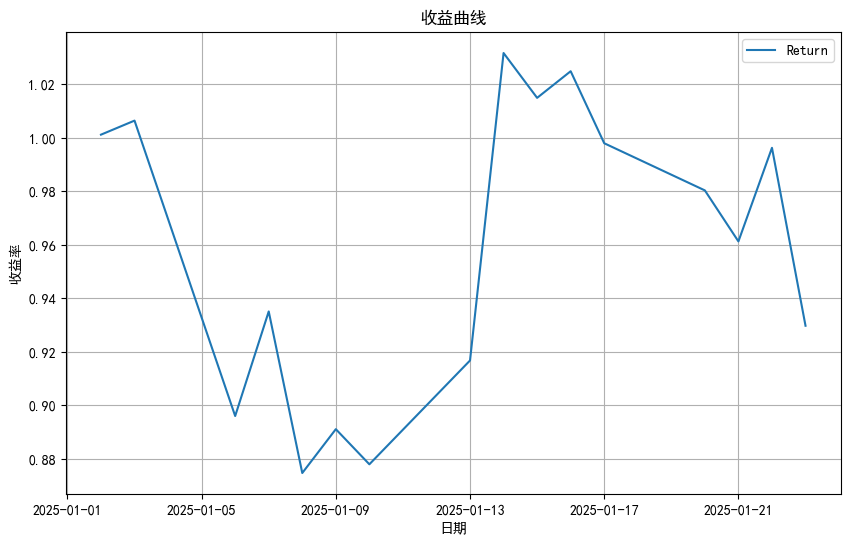

In [25]:
plot(df_after_date, 'first_cumulative_returns')

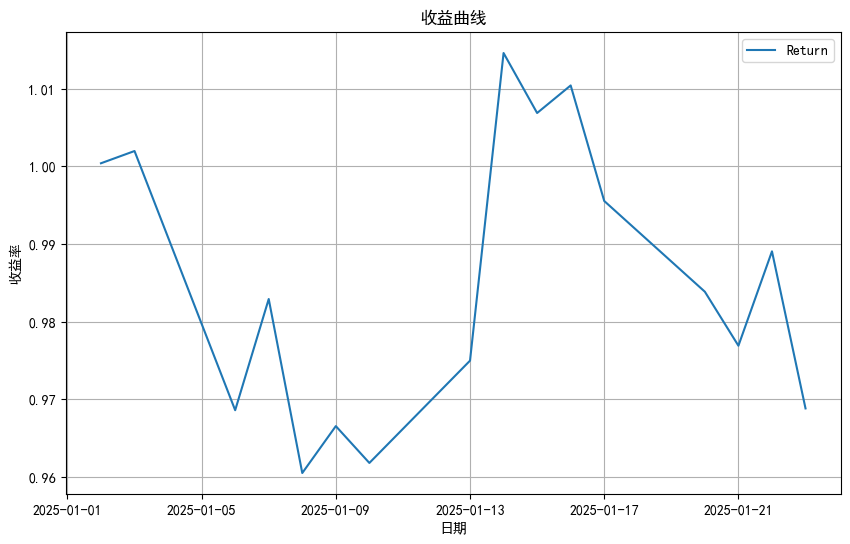

In [26]:
plot(df_after_date, 'p_first_cumulative_returns')

In [27]:
0.008906*0.3

0.0026718

In [28]:
3.61*0.3

1.083

In [29]:
df_g_zero

,code,strategy_name,sub_strategy_name,return,max_return,first_return,top2_return,top3_return,position,codes_num,trendScore,shortLineScore,shortLineScoreChange,cumulative_returns,p_return,p_cumulative_returns,first_cumulative_returns,p_first_return,p_first_cumulative_returns,p3_return,p3_cumulative_returns,p3_first_return,p3_first_cumulative_returns
date,,,,,,,,,,,,,,,,,,,,,,,
2024-08-01,605178.0,低吸,低位低吸,0.002224,0.002224,0.002224,0.002224,0.002224,1.000000,1,15.83,53.76,25.35,1.002224,0.002224,1.002224,1.002224,0.002224,1.002224,0.000222,1.000222,0.000334,1.000334
2024-08-02,603082.0,低吸,低位低吸,0.033478,0.033478,0.033478,0.033478,0.033478,0.927208,1,17.33,53.90,0.14,1.035776,0.031041,1.033334,1.035776,0.031041,1.033334,0.003348,1.003571,0.005022,1.005357
2024-08-05,1316.0,低吸,低位低吸,-0.037152,-0.037152,-0.037152,-0.037152,-0.037152,0.675140,1,10.36,37.66,-16.24,0.997295,-0.025083,1.007415,0.997295,-0.025083,1.007415,-0.003715,0.999842,-0.005573,0.999754
2024-08-06,16.0,低吸,低位低吸,-0.097473,-0.097473,-0.097473,-0.097473,-0.097473,0.551162,1,-5.12,9.67,-27.99,0.900086,-0.053723,0.953294,0.900086,-0.053723,0.953294,-0.009747,0.990097,-0.014621,0.985137
2024-08-07,2278.0,低吸,低位低吸,0.041943,0.041943,0.041943,0.041943,0.041943,0.396782,1,-13.50,-18.09,-27.76,0.937838,0.016642,0.969158,0.937838,0.016642,0.969158,0.004194,0.994249,0.006291,0.991335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-17,3042.0,低吸,低位低吸,-0.026283,-0.026283,-0.026283,-0.026283,-0.026283,0.560071,1,16.56,30.03,20.65,2.620187,-0.014720,2.405669,2.620187,-0.014720,2.405669,-0.002628,1.123770,-0.003942,1.189183
2025-01-20,603808.0,低吸,低位低吸,-0.017677,-0.017677,-0.017677,-0.017677,-0.017677,0.664101,1,4.97,22.67,-7.36,2.573871,-0.011739,2.377428,2.573871,-0.011739,2.377428,-0.001768,1.121784,-0.002652,1.186029
2025-01-21,2291.0,低吸,低位低吸,-0.019461,-0.019461,-0.019461,-0.019461,-0.019461,0.363078,1,-2.88,-26.12,-48.79,2.523780,-0.007066,2.360629,2.523780,-0.007066,2.360629,-0.001946,1.119600,-0.002919,1.182567


# 不按凯利公式调仓
## return
- 最大回撤: -20.73%
- 夏普比率: 0.09
- 总收益率: 14.75%
- 波动率: 5.90%
- 最大收益: 16.11%
- 总盈亏: 11.40%
- 成功次数: 19
- 胜率: 51.35%
- 平均盈利: 5.08%
- 平均亏损: -4.25%
- 最大盈利: 16.11%
- 最大亏损: -8.12%
- 盈亏比: 1.20
- 凯利公式最佳仓位: 10.67%

## p return
- 最大回撤: -13.76%
- 夏普比率: 0.19
- 总收益率: 28.26%
- 波动率: 3.91%
- 最大收益: 14.37%
- 总盈亏: 25.16%
- 成功次数: 19
- 胜率: 51.35%
- 平均盈利: 3.46%
- 平均亏损: -2.12%
- 最大盈利: 14.37%
- 最大亏损: -4.99%
- 盈亏比: 1.64
- 凯利公式最佳仓位: 21.61%

## first return
- 最大回撤: -13.93%
- 夏普比率: 0.12
- 总收益率: 23.89%
- 波动率: 5.88%
- 最大收益: 16.11%
- 总盈亏: 20.55%
- 成功次数: 20
- 胜率: 54.05%
- 平均盈利: 4.98%
- 平均亏损: -4.23%
- 最大盈利: 16.11%
- 最大亏损: -9.67%
- 盈亏比: 1.18
- 凯利公式最佳仓位: 15.04%

## p first_return
- 最大回撤: -13.74%
- 夏普比率: 0.20
- 总收益率: 31.27%
- 波动率: 3.85%
- 最大收益: 14.37%
- 总盈亏: 28.17%
- 成功次数: 20
- 胜率: 54.05%
- 平均盈利: 3.30%
- 平均亏损: -2.12%
- 最大盈利: 14.37%
- 最大亏损: -4.99%
- 盈亏比: 1.55
- 凯利公式最佳仓位: 24.50%

## p3 return
- 最大回撤: -6.54%
- 夏普比率: 0.09
- 总收益率: 5.59%
- 波动率: 1.77%
- 最大收益: 4.83%
- 总盈亏: 4.58%
- 成功次数: 19
- 胜率: 51.35%
- 平均盈利: 1.52%
- 平均亏损: -1.27%
- 最大盈利: 4.83%
- 最大亏损: -2.44%
- 盈亏比: 1.20
- 凯利公式最佳仓位: 10.67%

## p3 first return
- 最大回撤: -4.28%
- 夏普比率: 0.12
- 总收益率: 8.05%
- 波动率: 1.76%
- 最大收益: 4.83%
- 总盈亏: 7.04%
- 成功次数: 20
- 胜率: 54.05%
- 平均盈利: 1.50%
- 平均亏损: -1.27%
- 最大盈利: 4.83%
- 最大亏损: -2.90%
- 盈亏比: 1.18
- 凯利公式最佳仓位: 15.04%


<!-- return:
最大回撤: -20.73%
夏普比率: 0.04
总收益率: 1.99%
波动率: 5.35%
最大收益: 10.37%
总盈亏: 5.31%
None
p return:
最大回撤: -7.64%
夏普比率: 0.21
总收益率: 14.38%
波动率: 3.52%
最大收益: 10.37%
总盈亏: 17.71%
None
first return:
最大回撤: -12.83%
夏普比率: 0.13
总收益率: 12.16%
波动率: 5.23%
最大收益: 10.37%
总盈亏: 15.49%
None
p first_return:
最大回撤: -4.61%
夏普比率: 0.26
总收益率: 18.58%
波动率: 3.44%
最大收益: 10.37%
总盈亏: 21.91%
None -->


# 按照凯利公式调仓
## return
- 最大回撤: -20.73%
- 夏普比率: 0.09
- 总收益率: 14.75%
- 波动率: 5.90%
- 最大收益: 16.11%
- 总盈亏: 11.40%
- 成功次数: 19
- 总次数: 37
- 胜率: 51.35%
- 平均盈利: 5.08%
- 平均亏损: -4.25%
- 最大盈利: 16.11%
- 最大亏损: -8.12%
- 盈亏比: 1.20
- 凯利公式最佳仓位: 10.67%

## p return
- 最大回撤: -13.76%
- 夏普比率: 0.19
- 总收益率: 28.26%
- 波动率: 3.91%
- 最大收益: 14.37%
- 总盈亏: 25.16%
- 成功次数: 19
- 总次数: 37
- 胜率: 51.35%
- 平均盈利: 3.46%
- 平均亏损: -2.12%
- 最大盈利: 14.37%
- 最大亏损: -4.99%
- 盈亏比: 1.64
- 凯利公式最佳仓位: 21.61%

## first return
- 最大回撤: -13.93%
- 夏普比率: 0.12
- 总收益率: 23.89%
- 波动率: 5.88%
- 最大收益: 16.11%
- 总盈亏: 20.55%
- 成功次数: 20
- 总次数: 37
- 胜率: 54.05%
- 平均盈利: 4.98%
- 平均亏损: -4.23%
- 最大盈利: 16.11%
- 最大亏损: -9.67%
- 盈亏比: 1.18
- 凯利公式最佳仓位: 15.04%

## p first_return
- 最大回撤: -13.74%
- 夏普比率: 0.20
- 总收益率: 31.27%
- 波动率: 3.85%
- 最大收益: 14.37%
- 总盈亏: 28.17%
- 成功次数: 20
- 总次数: 37
- 胜率: 54.05%
- 平均盈利: 3.30%
- 平均亏损: -2.12%
- 最大盈利: 14.37%
- 最大亏损: -4.99%
- 盈亏比: 1.55
- 凯利公式最佳仓位: 24.50%

## p3 return
- 最大回撤: -2.21%
- 夏普比率: 0.09
- 总收益率: 1.96%
- 波动率: 0.59%
- 最大收益: 1.61%
- 总盈亏: 1.62%
- 成功次数: 19
- 总次数: 37
- 胜率: 51.35%
- 平均盈利: 0.51%
- 平均亏损: -0.42%
- 最大盈利: 1.61%
- 最大亏损: -0.81%
- 盈亏比: 1.20
- 凯利公式最佳仓位: 10.67%

## p3 first return
- 最大回撤: -2.15%
- 夏普比率: 0.12
- 总收益率: 4.10%
- 波动率: 0.88%
- 最大收益: 2.42%
- 总盈亏: 3.59%
- 成功次数: 20
- 总次数: 37
- 胜率: 54.05%
- 平均盈利: 0.75%
- 平均亏损: -0.63%
- 最大盈利: 2.42%
- 最大亏损: -1.45%
- 盈亏比: 1.18
- 凯利公式最佳仓位: 15.04%


# 10月15号后
## return
- 最大回撤: -20.73%
- 夏普比率: 0.04
- 总收益率: 1.99%
- 波动率: 5.35%
- 最大收益: 10.37%
- 总盈亏: 5.31%
- 成功次数: 10
- 总次数: 19
- 胜率: 52.63%
- 平均盈利: 4.50%
- 平均亏损: -4.48%
- 最大盈利: 10.37%
- 最大亏损: -8.12%
- 盈亏比: 1.00
- 凯利公式最佳仓位: 5.48%

## p return
- 最大回撤: -7.64%
- 夏普比率: 0.21
- 总收益率: 14.38%
- 波动率: 3.52%
- 最大收益: 10.37%
- 总盈亏: 17.71%
- 成功次数: 10
- 总次数: 19
- 胜率: 52.63%
- 平均盈利: 3.30%
- 平均亏损: -2.04%
- 最大盈利: 10.37%
- 最大亏损: -4.61%
- 盈亏比: 1.62
- 凯利公式最佳仓位: 23.34%

## first return
- 最大回撤: -12.83%
- 夏普比率: 0.13
- 总收益率: 12.16%
- 波动率: 5.23%
- 最大收益: 10.37%
- 总盈亏: 15.49%
- 成功次数: 11
- 总次数: 19
- 胜率: 57.89%
- 平均盈利: 4.49%
- 平均亏损: -4.41%
- 最大盈利: 10.37%
- 最大亏损: -8.12%
- 盈亏比: 1.02
- 凯利公式最佳仓位: 16.54%

## p first_return
- 最大回撤: -4.61%
- 夏普比率: 0.26
- 总收益率: 18.58%
- 波动率: 3.44%
- 最大收益: 10.37%
- 总盈亏: 21.91%
- 成功次数: 11
- 总次数: 19
- 胜率: 57.89%
- 平均盈利: 3.13%
- 平均亏损: -2.03%
- 最大盈利: 10.37%
- 最大亏损: -4.61%
- 盈亏比: 1.54
- 凯利公式最佳仓位: 30.60%
